In [1]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker # updated
import seaborn as sns
import numpy as np

# Extact and save movie and money data

In [2]:
movies = pd.read_csv("Craig_portion/Resources/tmdb_5000_movies.csv")
movies_df = pd.DataFrame(movies)
movies_df=movies_df.rename(columns={"overview": "Overview", "vote_average":"Average Vote", "title":"Title", "revenue":"Revenue", "budget":"Budget"})
movies_df.head(3)

,Budget,genres,homepage,id,keywords,original_language,original_title,Overview,popularity,production_companies,production_countries,release_date,Revenue,runtime,spoken_languages,status,tagline,Title,Average Vote,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


## Movie file data analysis 

In [3]:
movies_df.describe()

,Budget,id,popularity,Revenue,runtime,Average Vote,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [4]:
movies_df.isnull().any()

Budget                  False
genres                  False
homepage                 True
id                      False
keywords                False
original_language       False
original_title          False
Overview                 True
popularity              False
production_companies    False
production_countries    False
release_date             True
Revenue                 False
runtime                  True
spoken_languages        False
status                  False
tagline                  True
Title                   False
Average Vote            False
vote_count              False
dtype: bool

In [5]:
movies_df.nunique()

Budget                   436
genres                  1175
homepage                1691
id                      4803
keywords                4222
original_language         37
original_title          4801
Overview                4800
popularity              4802
production_companies    3697
production_countries     469
release_date            3280
Revenue                 3297
runtime                  156
spoken_languages         544
status                     3
tagline                 3944
Title                   4800
Average Vote              71
vote_count              1609
dtype: int64

In [6]:
movies_df["status"].value_counts()

Released           4795
Rumored               5
Post Production       3
Name: status, dtype: int64

In [7]:
sum(pd.isnull(movies_df['release_date']))

1

In [8]:
movies_df.dropna(subset=["release_date"],inplace=True)

In [9]:
movies_df.loc[(movies_df["Revenue"]<=0) | (movies_df["Budget"]<=0)].count()

Budget                  1573
genres                  1573
homepage                 365
id                      1573
keywords                1573
original_language       1573
original_title          1573
Overview                1570
popularity              1573
production_companies    1573
production_countries    1573
release_date            1573
Revenue                 1573
runtime                 1571
spoken_languages        1573
status                  1573
tagline                  975
Title                   1573
Average Vote            1573
vote_count              1573
dtype: int64

In [10]:
movies_df.loc[(movies_df["Average Vote"]==0)].count()

Budget                  62
genres                  62
homepage                13
id                      62
keywords                62
original_language       62
original_title          62
Overview                61
popularity              62
production_companies    62
production_countries    62
release_date            62
Revenue                 62
runtime                 61
spoken_languages        62
status                  62
tagline                 15
Title                   62
Average Vote            62
vote_count              62
dtype: int64

## Movie data analysis results

 - Out of c4,803 records in the source data c1,574 have zero value for Budget and/or Revenue - removed.
 - 1 record had Null release date - removed.
 - 8 Records in status Rumored(c5) and Post Production(c3) removed.
 - Average Vote is 0 for 62 records - to be taken into account

## Create a clean movie dataset

In [11]:
movies_money_df=movies_df.loc[(movies_df["status"]=="Released") & (movies_df["Revenue"]>0) & (movies_df["Budget"]>0),["Budget","Revenue","Title","Average Vote","release_date"]]

In [12]:
movies_money_df.isnull().any()

Budget          False
Revenue         False
Title           False
Average Vote    False
release_date    False
dtype: bool

In [13]:
movies_money_df.describe()

,Budget,Revenue,Average Vote
count,3.228000e+03,3.228000e+03,3228.000000
mean,4.066642e+07,1.212803e+08,6.309665
std,4.439840e+07,1.863197e+08,0.873846
min,1.000000e+00,5.000000e+00,0.000000
25%,1.050000e+07,1.700000e+07,5.800000
50%,2.500000e+07,5.519150e+07,6.300000
75%,5.500000e+07,1.463434e+08,6.900000
max,3.800000e+08,2.787965e+09,8.500000


## Assess the nature of revenues and budgets money values

### Add release year field and plot the data

In [14]:
movies_money_df['Release Year']=movies_money_df['release_date'].str[:4].astype(float)

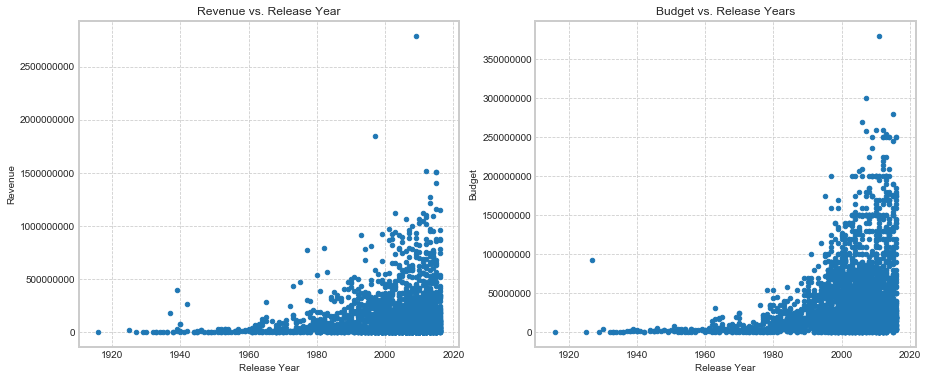

In [15]:
sns.set_style(style='whitegrid',rc={'axes.linewidth': 2.0, 'legend.frameon': True, 'grid.linestyle': u'--',  'legend.scatterpoints': 1, 'font.size': 10, 'axes.labelsize': 10, 'legend.fontsize': 10, 'axes.titlesize': 8, 'xtick.labelsize': 12, 'ytick.labelsize': 10})
figig, (ax1,ax2) = plt.subplots(1,2, sharey=False, sharex=True, figsize=(15,6))
movies_money_df.plot(x="Release Year",y="Revenue",kind="scatter", ax = ax1)
movies_money_df.plot(x="Release Year",y="Budget",kind="scatter", ax = ax2)
ax1.ticklabel_format(style='plain',axis='y')
ax2.ticklabel_format(style='plain',axis='y')
ax1.set_title('Revenue vs. Release Year')
ax2.set_title('Budget vs. Release Years')
plt.savefig("OutputImages/Budget and Revenue vs Release Year - original data.png",dpi=300) #added
plt.show()

Due to steep increase in budgets and revenues, it appears the data provides historic value of money. Check on sample of movies on the internet - TBD  

### Add present day value of budgets and revenues

3% avg annual inflation rate is used. Generated values are in millions.

In [16]:
movies_money_df["Revenue, USD mln"]=movies_money_df["Revenue"]/1000000 #added
movies_money_df["Budget, USD mln"]=movies_money_df["Budget"]/1000000 #added
for index,row in movies_money_df.iterrows():
   movies_money_df.at[index,"Revenue Adjusted, USD mln"]=row["Revenue, USD mln"]*(1.03**(2017-row["Release Year"])) #updated all
   movies_money_df.at[index,"Revenue Adjusted"]=row["Revenue"]*(1.03**(2017-row["Release Year"])) #updated all
   movies_money_df.at[index,"Budget Adjusted, USD mln"]=row["Budget, USD mln"]*(1.03**(2017-row["Release Year"])) #updated all

In [17]:
movies_money_df.head()

,Budget,Revenue,Title,Average Vote,release_date,Release Year,"Revenue, USD mln","Budget, USD mln","Revenue Adjusted, USD mln",Revenue Adjusted,"Budget Adjusted, USD mln"
0,237000000,2787965087,Avatar,7.2,2009-12-10,2009.0,2787.965087,237.0,3531.710760,3.531711e+09,300.224509
1,300000000,961000000,Pirates of the Caribbean: At World's End,6.9,2007-05-19,2007.0,961.000000,300.0,1291.503641,1.291504e+09,403.174914
2,245000000,880674609,Spectre,6.3,2015-10-26,2015.0,880.674609,245.0,934.307693,9.343077e+08,259.920500
3,250000000,1084939099,The Dark Knight Rises,7.6,2012-07-16,2012.0,1084.939099,250.0,1257.741770,1.257742e+09,289.818519
4,260000000,284139100,John Carter,6.1,2012-03-07,2012.0,284.139100,260.0,329.395092,3.293951e+08,301.411259


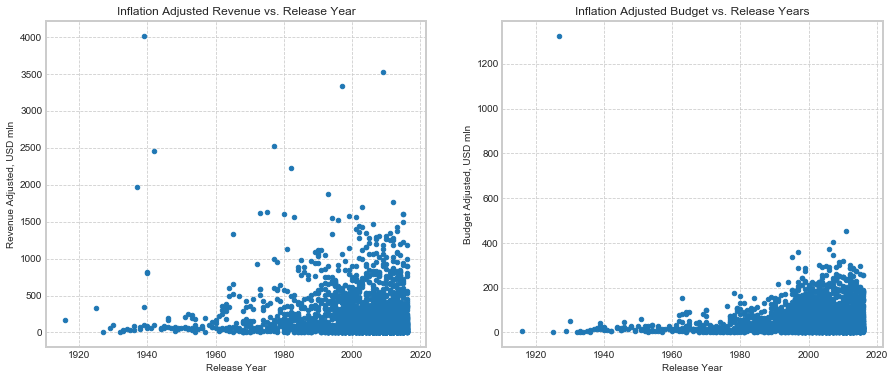

In [18]:
#added
sns.set_style(style='whitegrid',rc={'axes.linewidth': 2.0, 'legend.frameon': True, 'grid.linestyle': u'--',  'legend.scatterpoints': 1, 'font.size': 10, 'axes.labelsize': 10, 'legend.fontsize': 10, 'axes.titlesize': 8, 'xtick.labelsize': 12, 'ytick.labelsize': 10})
fig, (ax1,ax2) = plt.subplots(1,2, sharey=False, sharex=True, figsize=(15,6))
movies_money_df.plot(x="Release Year",y="Revenue Adjusted, USD mln",kind="scatter", ax = ax1)
movies_money_df.plot(x="Release Year",y="Budget Adjusted, USD mln",kind="scatter", ax = ax2)
ax1.ticklabel_format(style='plain',axis='y')
ax2.ticklabel_format(style='plain',axis='y')
ax1.set_title('Inflation Adjusted Revenue vs. Release Year')
ax2.set_title('Inflation Adjusted Budget vs. Release Years')
plt.savefig("OutputImages/Budget and Revenue vs Release Year - inflation adjusted.png",dpi=300) #added
plt.show()

### Revenue outlier analysis and flagging

Based on the revenue chart there are 8 outliers - listed below.
Snow White and the Seven Dwarfs, Gone with the Wind, Bambi - wikipedia confirms revenue data is correct.

In [19]:
movies_money_df.sort_values(["Revenue Adjusted, USD mln"],ascending=[False],inplace=True)
movies_money_df.head(8)

,Budget,Revenue,Title,Average Vote,release_date,Release Year,"Revenue, USD mln","Budget, USD mln","Revenue Adjusted, USD mln",Revenue Adjusted,"Budget Adjusted, USD mln"
3813,4000000,400176459,Gone with the Wind,7.7,1939-12-15,1939.0,400.176459,4.000000,4013.793858,4.013794e+09,40.120240
0,237000000,2787965087,Avatar,7.2,2009-12-10,2009.0,2787.965087,237.000000,3531.710760,3.531711e+09,300.224509
25,200000000,1845034188,Titanic,7.5,1997-11-18,1997.0,1845.034188,200.000000,3332.336975,3.332337e+09,361.222247
2912,11000000,775398007,Star Wars,8.1,1977-05-25,1977.0,775.398007,11.000000,2529.377603,2.529378e+09,35.882416
4441,858000,267447150,Bambi,6.8,1942-08-14,1942.0,267.447150,0.858000,2454.877510,2.454878e+09,7.875518
2967,10500000,792910554,E.T. the Extra-Terrestrial,7.3,1982-04-03,1982.0,792.910554,10.500000,2231.141238,2.231141e+09,29.545556
4259,1488423,184925486,Snow White and the Seven Dwarfs,6.9,1937-12-20,1937.0,184.925486,1.488423,1967.771858,1.967772e+09,15.838146
675,63000000,920100000,Jurassic Park,7.6,1993-06-11,1993.0,920.100000,63.000000,1870.373857,1.870374e+09,128.066029


In [20]:
#added
movies_money_df["Outlier"]=False

i=0
for index,row in movies_money_df.iterrows():
    movies_money_df.loc[index,"Outlier"]=True
    i=i+1
    if i==7:
        break

### Budget outliers analysis and flagging

Based on the Budget chart above, there is one clear outlier - Metropolis movie. Budget as well as revenue data on the film is confirmed on wikipedia.

In [21]:
#added
movies_money_df.sort_values(["Budget Adjusted, USD mln"],ascending=[False],inplace=True)# updated
movies_money_df.head(1)# updated

,Budget,Revenue,Title,Average Vote,release_date,Release Year,"Revenue, USD mln","Budget, USD mln","Revenue Adjusted, USD mln",Revenue Adjusted,"Budget Adjusted, USD mln",Outlier
2638,92620000,650422,Metropolis,8.0,1927-01-10,1927.0,0.650422,92.62,9.301338,9.301338e+06,1324.509264,False


In [22]:
i=0
for index,row in movies_money_df.iterrows():
    movies_money_df.loc[index,"Outlier"]=True
    i=i+1
    if i==1:
        break
        

### Reassess the data with outliers flagged and hidden

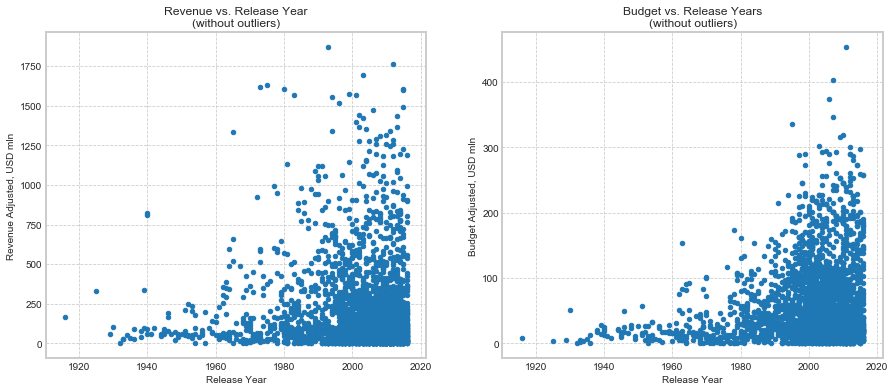

In [23]:
fig, (ax1,ax2) = plt.subplots(1,2, sharey=False, sharex=True, figsize=(15,6))
movies_money_df[movies_money_df["Outlier"]==False].plot(x="Release Year",y="Revenue Adjusted, USD mln",kind="scatter", ax = ax1)
movies_money_df[movies_money_df["Outlier"]==False].plot(x="Release Year",y="Budget Adjusted, USD mln",kind="scatter", ax = ax2)
ax1.set_title('Revenue vs. Release Year\n(without outliers)')
ax2.set_title('Budget vs. Release Years\n(without outliers)')
plt.savefig("OutputImages/Budget and Revenue vs Release Year.png",dpi=300) #added
plt.show()

# Extract and save starring actors data

First 3 actors for each movie are extracted and considred as starring actors for the movie.

In [24]:
actors_df = pd.read_csv("Craig_portion/Resources/tmdb_5000_credits.csv")
actors_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [25]:
actors_df.isnull().any()

movie_id    False
title       False
cast        False
crew        False
dtype: bool

In [26]:
for index,row in actors_df.iterrows():
    given_movies_actor_value=eval(row['cast'])
    given_movie_actors_df = pd.DataFrame(given_movies_actor_value)
    given_movie_actors_df["Title"]=row['title']
    try:
        given_movie_actors_df.drop(axis=1,columns=['cast_id','character','credit_id','gender','id','order'],inplace=True)
    except:
        pass
    
    if(index==0):
        movie_actor_df=given_movie_actors_df.iloc[0:3]
    else:
        movie_actor_df=movie_actor_df.append(given_movie_actors_df.iloc[0:3])

movie_actor_df.rename(columns={"name":"Actor"},inplace=True)   
movie_actor_df.head()   

,Title,Actor
0,Avatar,Sam Worthington
1,Avatar,Zoe Saldana
2,Avatar,Sigourney Weaver
0,Pirates of the Caribbean: At World's End,Johnny Depp
1,Pirates of the Caribbean: At World's End,Orlando Bloom


In [27]:
movie_actor_df.describe()

,Title,Actor
count,14250,14250
unique,4757,5687
top,The Host,Robert De Niro
freq,6,46


In [28]:
movie_actor_df.isnull().any()

Title    False
Actor    False
dtype: bool

In [29]:
movie_actor_df.to_csv("GeneratedData\movies_actors.csv",index=False)

# Generate the measure of starring actors' popularity for each movie  

 - For each of 3 starring actors of each movie, wieghted revenues of all prior movies are totalled
 - The weighting decreases prior revenues at 2% for each year of time difference

In [30]:
movie_max_total_revenue_by_actor=[]

for index,row in movies_money_df.iterrows():
    curr_movie_actors_df=movie_actor_df.loc[movie_actor_df['Title']==row['Title']]
    curr_movie_actors_all_movies_df=pd.DataFrame.merge(curr_movie_actors_df,movie_actor_df,on='Actor')
    prior_movies_df=movies_money_df.loc[movies_money_df['Release Year']<row['Release Year']]
    curr_movie_actors_all_prior_movies_df=pd.DataFrame.merge(curr_movie_actors_all_movies_df,prior_movies_df,left_on="Title_y", right_on="Title")

    #added
    curr_movie_actors_all_prior_movies_df["Prior Movie Weight"]=1-2*(row['Release Year']-curr_movie_actors_all_prior_movies_df["Release Year"])/100
    curr_movie_actors_all_prior_movies_df["Weighted Revenue Adjusted, USD mln"]=curr_movie_actors_all_prior_movies_df["Prior Movie Weight"]*curr_movie_actors_all_prior_movies_df["Revenue Adjusted, USD mln"]
    
    curr_movie_actors_all_prior_movies_before_gr_ser=curr_movie_actors_all_prior_movies_df.groupby(by="Actor").sum()#updated
    
    max_actor_avg_prior_rev=curr_movie_actors_all_prior_movies_before_gr_ser["Weighted Revenue Adjusted, USD mln"].max() #updated
    movie_max_total_revenue_by_actor.append(max_actor_avg_prior_rev)  
   
#     try:
#         max_actor_avg_prior_rev=curr_movie_actors_all_prior_movies_before_gr_ser["Weighted Revenue Adjusted, USD mln"].max() #updated
#         movie_max_total_revenue_by_actor.append(max_actor_avg_prior_rev)
#     except:
#         movie_max_total_revenue_by_actor.append(0)

se = pd.Series(movie_max_total_revenue_by_actor)
movies_money_df['Starring Actors Popularity'] = se.values

In [31]:
movies_money_df.head()

,Budget,Revenue,Title,Average Vote,release_date,Release Year,"Revenue, USD mln","Budget, USD mln","Revenue Adjusted, USD mln",Revenue Adjusted,"Budget Adjusted, USD mln",Outlier,Starring Actors Popularity
2638,92620000,650422,Metropolis,8.0,1927-01-10,1927.0,0.650422,92.62,9.301338,9.301338e+06,1324.509264,True,NaN
17,380000000,1045713802,Pirates of the Caribbean: On Stranger Tides,6.4,2011-05-14,2011.0,1045.713802,380.00,1248.636967,1.248637e+09,453.739873,False,7103.622020
1,300000000,961000000,Pirates of the Caribbean: At World's End,6.9,2007-05-19,2007.0,961.000000,300.00,1291.503641,1.291504e+09,403.174914,False,4383.529869
10,270000000,391081192,Superman Returns,5.4,2006-06-28,2006.0,391.081192,270.00,541.347832,5.413478e+08,373.743145,False,1555.519755
25,200000000,1845034188,Titanic,7.5,1997-11-18,1997.0,1845.034188,200.00,3332.336975,3.332337e+09,361.222247,True,324.643821


In [32]:
movies_money_df.at[movies_money_df["Starring Actors Popularity"].isnull(),"Starring Actors Popularity"]=0
movies_money_df.head()

,Budget,Revenue,Title,Average Vote,release_date,Release Year,"Revenue, USD mln","Budget, USD mln","Revenue Adjusted, USD mln",Revenue Adjusted,"Budget Adjusted, USD mln",Outlier,Starring Actors Popularity
2638,92620000,650422,Metropolis,8.0,1927-01-10,1927.0,0.650422,92.62,9.301338,9.301338e+06,1324.509264,True,0.000000
17,380000000,1045713802,Pirates of the Caribbean: On Stranger Tides,6.4,2011-05-14,2011.0,1045.713802,380.00,1248.636967,1.248637e+09,453.739873,False,7103.622020
1,300000000,961000000,Pirates of the Caribbean: At World's End,6.9,2007-05-19,2007.0,961.000000,300.00,1291.503641,1.291504e+09,403.174914,False,4383.529869
10,270000000,391081192,Superman Returns,5.4,2006-06-28,2006.0,391.081192,270.00,541.347832,5.413478e+08,373.743145,False,1555.519755
25,200000000,1845034188,Titanic,7.5,1997-11-18,1997.0,1845.034188,200.00,3332.336975,3.332337e+09,361.222247,True,324.643821


In [33]:
movies_money_df.head()

,Budget,Revenue,Title,Average Vote,release_date,Release Year,"Revenue, USD mln","Budget, USD mln","Revenue Adjusted, USD mln",Revenue Adjusted,"Budget Adjusted, USD mln",Outlier,Starring Actors Popularity
2638,92620000,650422,Metropolis,8.0,1927-01-10,1927.0,0.650422,92.62,9.301338,9.301338e+06,1324.509264,True,0.000000
17,380000000,1045713802,Pirates of the Caribbean: On Stranger Tides,6.4,2011-05-14,2011.0,1045.713802,380.00,1248.636967,1.248637e+09,453.739873,False,7103.622020
1,300000000,961000000,Pirates of the Caribbean: At World's End,6.9,2007-05-19,2007.0,961.000000,300.00,1291.503641,1.291504e+09,403.174914,False,4383.529869
10,270000000,391081192,Superman Returns,5.4,2006-06-28,2006.0,391.081192,270.00,541.347832,5.413478e+08,373.743145,False,1555.519755
25,200000000,1845034188,Titanic,7.5,1997-11-18,1997.0,1845.034188,200.00,3332.336975,3.332337e+09,361.222247,True,324.643821


In [34]:
sum(pd.isnull(movies_money_df['Starring Actors Popularity']))

0

# Save cleaned and enhanced movie dataset to csv

In [35]:
movies_money_df.to_csv("GeneratedData\movies.csv",index=False)

# Extract and save genres data

In [36]:
for index,row in movies_df.iterrows():
    given_movies_genre_value=eval(row['genres'])
    given_movie_genres_df = pd.DataFrame(given_movies_genre_value)
    given_movie_genres_df["Title"]=row['Title']
    try:
        given_movie_genres_df.drop(axis=1,columns=['id'],inplace=True)
    except:
        pass
    
    if(index==0):
        movie_genre_df=given_movie_genres_df
    else:
        movie_genre_df=movie_genre_df.append(given_movie_genres_df)

movie_genre_df.rename(columns={"name":"Genre"},inplace=True)   
movie_genre_df.head() 

,Title,Genre
0,Avatar,Action
1,Avatar,Adventure
2,Avatar,Fantasy
3,Avatar,Science Fiction
0,Pirates of the Caribbean: At World's End,Adventure


In [37]:
movie_genre_df.describe()

,Title,Genre
count,12160,12160
unique,4772,20
top,The Host,Drama
freq,8,2297


In [38]:
genres_list={"Mood":['Comedy','Thriller','Horror','Drama','Action','Fantasy','Mystery'],
"Concept":['Crime','Science Fiction','Family','Romance','Adventure','Western','War','History']}
movie_genre_df["Genre"].value_counts()
genres_list_all=movie_genre_df["Genre"].unique()
genres_list_all

array(['Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime',
       'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy',
       'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music',
       'Documentary', 'Foreign', 'TV Movie'], dtype=object)

In [39]:
movie_genre_df.to_csv("GeneratedData\movies_genres.csv",index=False)

In [40]:
actor_genres_df=pd.DataFrame.merge(movie_actor_df,movie_genre_df, on="Title")
actor_genres_df.dropna(inplace=True)
actor_genres_df.head()

,Title,Actor,Genre
0,Avatar,Sam Worthington,Action
1,Avatar,Sam Worthington,Adventure
2,Avatar,Sam Worthington,Fantasy
3,Avatar,Sam Worthington,Science Fiction
4,Avatar,Zoe Saldana,Action


In [41]:
actor_genres_counts=actor_genres_df.groupby(by=["Actor","Genre"]).count()
actor_genres_counts.rename(columns={"Title":"Movies Count"},inplace=True)
actor_genres_counts.reset_index(inplace=True)
actor_genres_counts.head()

,Actor,Genre,Movies Count
0,"""Weird Al"" Yankovic",Comedy,1
1,50 Cent,Action,1
2,50 Cent,Crime,1
3,50 Cent,Drama,2
4,50 Cent,Thriller,1


# Actors starred most, by movie genre 

In [42]:
actors_name=[]
actors_genre=[]
actors_genre_count=[]

for genre in genres_list_all:
    given_genre_actors=actor_genres_counts.loc[actor_genres_counts["Genre"]==genre]
    given_genre_actors_max=given_genre_actors.loc[given_genre_actors["Movies Count"].idxmax()]
    actors_genre.append(genre)
    actors_name.append(given_genre_actors_max["Actor"])
    actors_genre_count.append(given_genre_actors_max["Movies Count"])


actors_genre_top_df=pd.DataFrame.from_dict({'Actor': actors_name, 'Genre': actors_genre, 'Count': actors_genre_count})
actors_genre_top_df.loc[actors_genre_top_df["Genre"].isin(genres_list["Mood"])].sort_values(["Count"],ascending=[False])


,Actor,Count,Genre
10,Will Ferrell,26,Comedy
5,Matt Damon,25,Drama
6,Bruce Willis,21,Thriller
0,Arnold Schwarzenegger,20,Action
2,Johnny Depp,11,Fantasy
12,Robert Englund,9,Horror
13,Liam Neeson,7,Mystery
